In [1]:
import os     # loads a library to work with data files
from os import listdir # loads a library to work with directories 

from matplotlib import image # loads a library to work with images
from matplotlib import pyplot as plt # loads a library to plot images

import numpy as np  # loads a library for working with matrixes 
from numpy import asarray # loads a library for saving matrices
from numpy import save # save matrices as files
from numpy import load # Load matrices from files

from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression



import datetime
import cv2


In [2]:
path = "./" #set the path for directory
!ls "./" # shows all files in your project

 face_data.npy			        gray_data.zip
'Face recognizing application .ipynb'   haarcascade_frontalface_default.xml
 face_target.npy		        Untitled.ipynb
 gray_data


In [3]:
os.chdir(path) 
dnam = 'gray_data'

# !unzip -q {dnam} # unzups the project file data.zip

!ls "./" # shows all files in your project

 face_data.npy			        gray_data.zip
'Face recognizing application .ipynb'   haarcascade_frontalface_default.xml
 face_target.npy		        Untitled.ipynb
 gray_data


In [4]:
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)

Number of images 20


(980, 735)


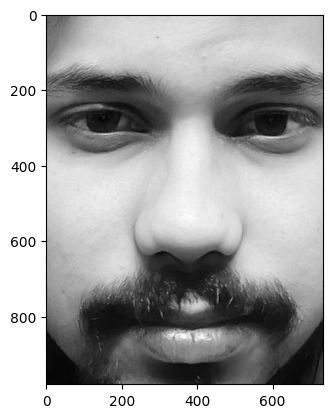

In [5]:

im1 = image.imread(path + dnam + '/' + fls[1]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
plt.imshow(im1, cmap=plt.cm.gray) # displays the image
plt.show()

In [6]:
m = im1.shape[0]*im1.shape[1]  # m = h*w = (77*68=5236) is the number of pixels in images
print("Number of pixels in images : ", m, "\n")

images_data = np.zeros((n, m)) # creates a nxm-matrix of the images
print("nxm-matrix of the images : \n", images_data, "\n")

images_target = np.zeros((n,))  # creates a n*1 matrix of targets which are the person labels 1 tp 30
print("n*1 matrix of targets : \n", images_target)

Number of pixels in images :  720300 

nxm-matrix of the images : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

n*1 matrix of targets : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# loops over all n=1500 images 
for i in range(0, n):
    filename = fls[i]  # loads a name of the image file

    img = image.imread(path + dnam + '/' + filename) # loads the image name
    images_data[i,:] = np.ravel(img) # vectorisation of the image 
    c = int(filename[5:6])  # extracts the class label from the file name
    images_target[i] = c  # assigns the target 
    print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

> loaded 0 imgh02.jpg 2
> loaded 1 imgb02.jpg 2
> loaded 2 imgg01.jpg 1
> loaded 3 imga02.jpg 2
> loaded 4 imge01.jpg 1
> loaded 5 imgj02.jpg 2
> loaded 6 imgf01.jpg 1
> loaded 7 imgb01.jpg 1
> loaded 8 imgh01.jpg 1
> loaded 9 imgc02.jpg 2
> loaded 10 imga01.jpg 1
> loaded 11 imgf02.jpg 2
> loaded 12 imgc01.jpg 1
> loaded 13 imgg02.jpg 2
> loaded 14 imgd02.jpg 2
> loaded 15 imgi01.jpg 1
> loaded 16 imgj01.jpg 1
> loaded 17 imgi02.jpg 2
> loaded 18 imge02.jpg 2
> loaded 19 imgd01.jpg 1


In [8]:
# save as a .npy file
fn = (path + '/' + 'face_data.npy') # creates the file name for the image data
save(fn, images_data) 
fn = (path + '/' + 'face_target.npy') # creates the file name for the targets
save(fn, images_target)

# Now the data and target are created as seperate .npy file

!ls "./"

 face_data.npy			        gray_data.zip
'Face recognizing application .ipynb'   haarcascade_frontalface_default.xml
 face_target.npy		        Untitled.ipynb
 gray_data


In [9]:
y = load(path + 'face_target.npy')
X = load(path + 'face_data.npy')

In [10]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

nof_prin_components = 6
pca = PCA( n_components= nof_prin_components, svd_solver = 'full', whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("length of x_train_pca : ", len(X_train_pca))
print("length of X_test_pca : ", len(X_test_pca), "\n")


# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative explained variance ratio
print("Cumulative explained variance ratio: \n", cumulative_explained_variance_ratio)


length of x_train_pca :  18
length of X_test_pca :  2 

Cumulative explained variance ratio: 
 [0.3811242  0.56889614 0.67228485 0.74175058 0.7850764  0.82544185]


In [11]:
# #AdaBoost Classifier

# clf_abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
#                               n_estimators=10, 
#                               algorithm="SAMME.R",
#                               learning_rate=0.1)
# clf = clf_abc.fit(X_train_pca, y_train)


In [12]:
#SVC Classifier

# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.fit(x)

clf_svc = OneVsOneClassifier(LinearSVC())
clf = clf_svc.fit(X_train_pca, y_train)

In [13]:
start_t = datetime.datetime.now()

y_pred = clf.predict(X_test_pca) # recognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy

end_t = datetime.datetime.now()


print("Processing Time : ", end_t-start_t)


              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Processing Time :  0:00:00.011329


In [15]:
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")
cam = cv2.VideoCapture(0)

# Create a dictionary to map predicted class labels to names
label_dict = {1: 'Baibhav', 2: 'Gaurav'}

while True:
    ret, frame = cam.read()

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face region
        face_img = frame[y:y+h, x:x+w]

        # Preprocess the face image
        face_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        face_resized = cv2.resize(face_gray, (735, 980))
        face_array = face_resized.reshape(1, -1)

        # Reduce the face dimensionality and make a prediction
        reduced_face_array = pca.transform(face_array)
        prediction = clf.predict(reduced_face_array)

        # Get the name of the predicted class label
        name = label_dict[prediction[0]]
        

        # Display the recognized face label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow("Face Recognition", frame)

    # Exit if the 'ESC' key is pressed
    key = cv2.waitKey(1)
    if key == 27:
        break

cam.release()
cv2.destroyAllWindows()
